In [ ]:
!pip install wordcloud
!pip install markdown


In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import markdown
import re
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
import unicodedata
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
st = PorterStemmer()
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
from textblob import TextBlob, Word, Blobber


In [ ]:
file_path = "/content/drive/MyDrive/Jessica/P6 (SWE).md"  # Remplacez par le chemin de votre fichier Markdown

with open(file_path, "r") as file:
    lines = [line.strip() for line in file.readlines()]

# Afficher les lignes
for line in lines:
    print(line)



# TEXT CLEANING 

In [5]:
    # Créer un DataFrame Pandas avec les lignes comme données
    df = pd.DataFrame({"Phrases": lines})

    # Supprimer les lignes indésirables (par exemple, les 20 premières lignes)
    df = df.drop(range(20))

    # Supprimer les lignes vides ou contenant uniquement des espaces
    df = df[df['Phrases'].str.strip() != '']

    # Réindexer le DataFrame
    df = df.reset_index(drop=True)

In [ ]:
Phrases =df['Phrases'].values
Phrases

In [8]:
Phrases=str(Phrases)

In [9]:
Phrases_Cleaned = Phrases.lower()

In [11]:
# Removing the  usernames from tweet string
Phrases_Cleaned=re.sub(r'@\w+', ' ', Phrases_Cleaned)
 
# Removing the URLS 
Phrases_Cleaned=re.sub(r'http\S+', ' ', Phrases_Cleaned)
 
 
# Deleting everything which is not characters
Phrases_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Phrases_Cleaned)
 
# Deleting any word which is less than 3-characters mostly those are stopwords
Phrases_Cleaned= re.sub(r'\b\w{1,2}\b', '', Phrases_Cleaned)
 
# Stripping extra spaces in the text
Phrases_Cleaned= re.sub(r' +', ' ', Phrases_Cleaned)

In [12]:
Phrases_Cleaned

' swe database migration during rollout staging decided not push prod til after holidays issues realizes they are part one another building git ops deployment system december trade offs how concentrates need form clear mental picture from user perspective technical implementation holiday quiet period beliefs and practices don want the guy that breaks the environment and vacation decision concsiously made not roll out prod taking action making the change expecting see but was rush did not test database change locally found typo automated tests are easier local testing difficult heuristics for testing locally not data change structural schema change this was mix the passed test because table was empty staging the table was not empty catastrophic failure migration typo partially applied did not roll back properly made the situation worse but everyone was meeting and didn notice system temporal reasoning make decision run container test suite only promote successful dec red herring really 

In [13]:
def clean(x):
 x = re.sub(r'^RT[\s]+', '', x)
 x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
 x = re.sub(r'#', '', x)
 x = re.sub(r'@[A-Za-z0–9]+', '', x) 
 return x

In [14]:
df['CleanPhrases'] = df['Phrases'].apply(clean)

In [15]:
df.head()

,Phrases,CleanPhrases
0,"SWE, database migration during rollout to stag...","SWE, database migration during rollout to stag..."
1,trade-offs? how he concentrates,trade-offs? how he concentrates
2,need to form a clear mental picture to go from...,need to form a clear mental picture to go from...
3,holiday quiet period -beliefs and practices. d...,holiday quiet period -beliefs and practices. d...
4,"taking action, making the change, expecting to...","taking action, making the change, expecting to..."


In [57]:
!pip install collection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5116 sha256=2e77b4f30ebaef8ef16a4cf0f52e515f8c451de93a0f5d5fa92b27636b43cab9
  Stored in directory: /root/.cache/pip/wheels/b8/eb/72/804383af94abbb9ac1893ace85e5620780f0819144486a8bc1
Successfully built collection


In [63]:
from nltk.corpus import stopwords

# Define the STOPWORDS
STOPWORDS = set(stopwords.words('english'))

# Add additional stopwords to the set
STOPWORDS = STOPWORDS.union(["ha", "yeah", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])

# Use the STOPWORDS in your code
df['Phrases_without_stopwords'] = df['CleanPhrases'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS]))


In [71]:
Phrases_without_stopwords=df['Phrases_without_stopwords']

In [75]:
import collections
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcount = {}
for word in Phrases_Cleaned.split():
    word = word.replace(".", "")
    word = word.replace(",", "")
    if word.lower() not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

word_counter = collections.Counter(wordcount)
top_words = word_counter.most_common(10)
print(top_words)


[('environment', 32), ('database', 28), ('would', 27), ('one', 26), ('think', 25), ('like', 24), ('data', 23), ('change', 21), ('test', 21), ('staging', 20)]


# **Stemming and Lemmitization**

In [ ]:
from nltk.stem import LancasterStemmer
my_stemmer = LancasterStemmer()
stemmed = [[my_stemmer.stem(word) for word in Phrases.split()] for review in Phrases ]
stemmed

In [38]:
lemmatizer = WordNetLemmatizer()
df['Phrases_stem'] = df['CleanPhrases'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Phrases_lem'] = df['Phrases_stem'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['Phrases_lem'].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    swe, databas migrat dure rollout to staging. d...
1                          trade-offs? how he concentr
2    need to form a clear mental pictur to go from ...
3    holiday quiet period -belief and practices. do...
4    take action, make the change, expect to see, b...
Name: Phrases_lem, dtype: object

In [41]:
df['polarity'] = df['Phrases_lem'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,Phrases,CleanPhrases,Phrases_without_stopwords,no_emoji,text_stem,Phrases_stem,Phrases_lem,polarity
0,"SWE, database migration during rollout to stag...","SWE, database migration during rollout to stag...","SWE, database migration rollout staging. decid...","SWE, database migration rollout staging. decid...","swe, databas migrat dure rollout to staging. d...","swe, databas migrat dure rollout to staging. d...","swe, databas migrat dure rollout to staging. d...",0.000000e+00
1,trade-offs? how he concentrates,trade-offs? how he concentrates,trade-offs? concentrates,trade-offs? concentrates,trade-offs? how he concentr,trade-offs? how he concentr,trade-offs? how he concentr,0.000000e+00
2,need to form a clear mental picture to go from...,need to form a clear mental picture to go from...,need form clear mental picture go user perspec...,need form clear mental picture go user perspec...,need to form a clear mental pictur to go from ...,need to form a clear mental pictur to go from ...,need to form a clear mental pictur to go from ...,6.938894e-18
3,holiday quiet period -beliefs and practices. d...,holiday quiet period -beliefs and practices. d...,holiday quiet period -beliefs practices. want ...,holiday quiet period -beliefs practices. want ...,holiday quiet period -belief and practices. do...,holiday quiet period -belief and practices. do...,holiday quiet period -belief and practices. do...,0.000000e+00
4,"taking action, making the change, expecting to...","taking action, making the change, expecting to...","taking action, making change, expecting see, n...","taking action, making change, expecting see, n...","take action, make the change, expect to see, b...","take action, make the change, expect to see, b...","take action, make the change, expect to see, b...",1.000000e-01


In [42]:
df['subjectivity'] = df['Phrases_lem'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [21]:
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)  

def remove_emoji(string):
    return emoji_pattern.sub(r'', string)


df['no_emoji'] = df['Phrases_without_stopwords'].apply(remove_emoji)

In [24]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') 
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [25]:
words = basic_clean(''.join(str(df['Phrases'].tolist()))) 

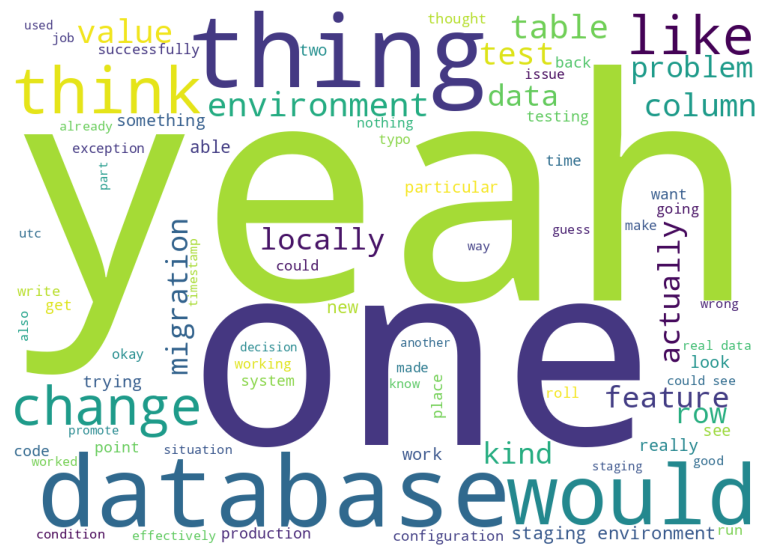

In [44]:
# Plotting the wordcloud 
from wordcloud import WordCloud

# Creating the  stopwords

customStopwords=list(STOPWORDS)

 
#wordcloudimage = WordCloud(
                         # max_words=100,
                         # max_font_size=500,
                          #font_step=2,
                          #stopwords=customStopwords,
                          #background_color='white',
                          #width=1000,
                          #height=720
                          #).generate(Tweet_Texts_Cleaned)
wordcloudimage=WordCloud(max_words=80,
                         max_font_size=500,
                         font_step=2,
                         stopwords=customStopwords,
                         background_color='white',
                         width=1000,
                         height=720).generate(Phrases_Cleaned)                          
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

# N-grams

In [26]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(staging, environment)    14
(could, see)               7
(real, data)               7
(complex, query)           6
(smoke, test)              6
(database, migration)      5
(quiet, period)            5
(look, like)               5
(test, environment)        4
(test, suite)              4
dtype: int64

In [27]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]

<Axes: >

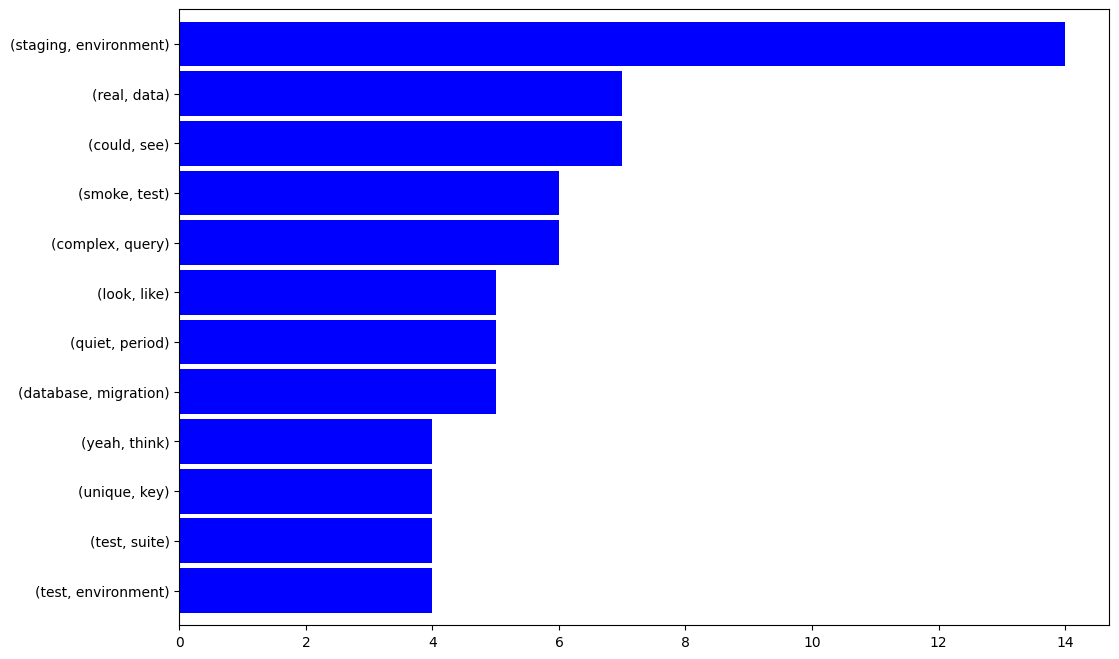

In [28]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

Text(0.5, 0, '# of Occurances')

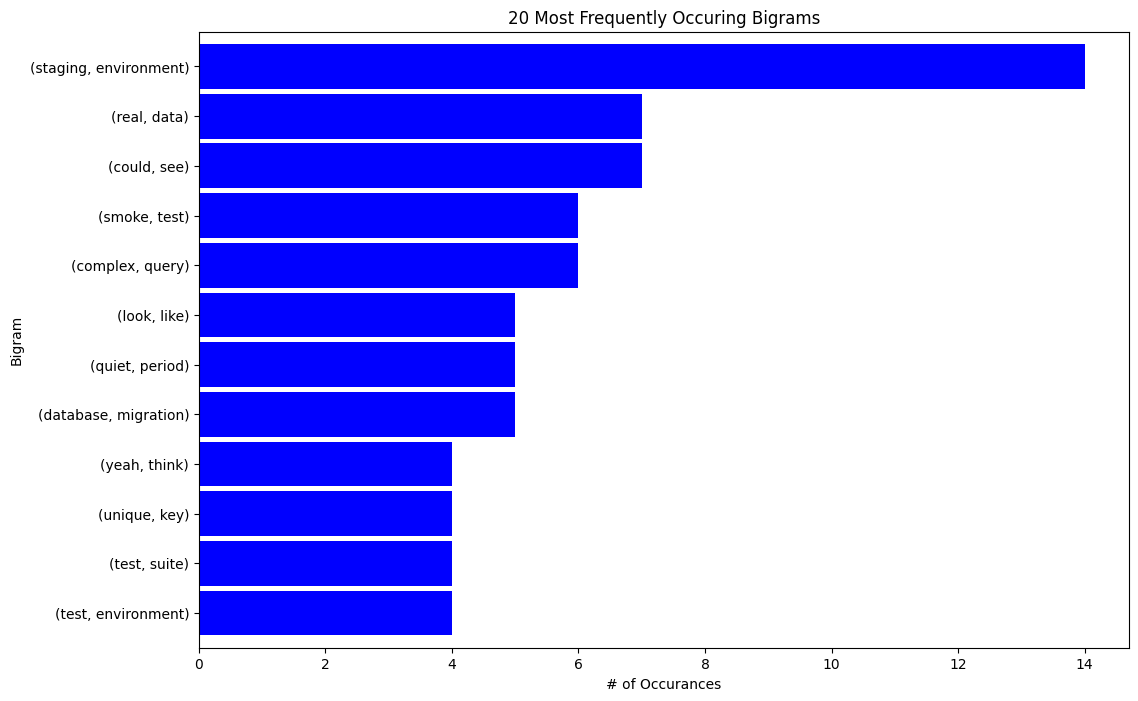

In [31]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [32]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(real, data, locally)            3
(table, worked, certain)         3
(worked, certain, way)           3
(could, see, exception)          3
(right, assumed, unique)         2
(column, successfully, added)    2
(column, write, data)            2
(write, data, every)             2
(data, every, row)               2
(every, row, existed)            2
dtype: int64

# **Bigram_networks**

In [48]:
bgs=(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20] # top 10 bigrams

In [49]:
bigram_df=bgs.to_frame().reset_index()
bigram_df.head()

,index,0
0,"(staging, environment)",14
1,"(could, see)",7
2,"(real, data)",7
3,"(complex, query)",6
4,"(smoke, test)",6


In [50]:
bigram_df = bigram_df.rename(columns= {0: 'bigram',1: 'count'})

In [51]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [52]:
!pip install networkx 
import networkx as nx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("btc", weight=100)#btc is a central point of sorts

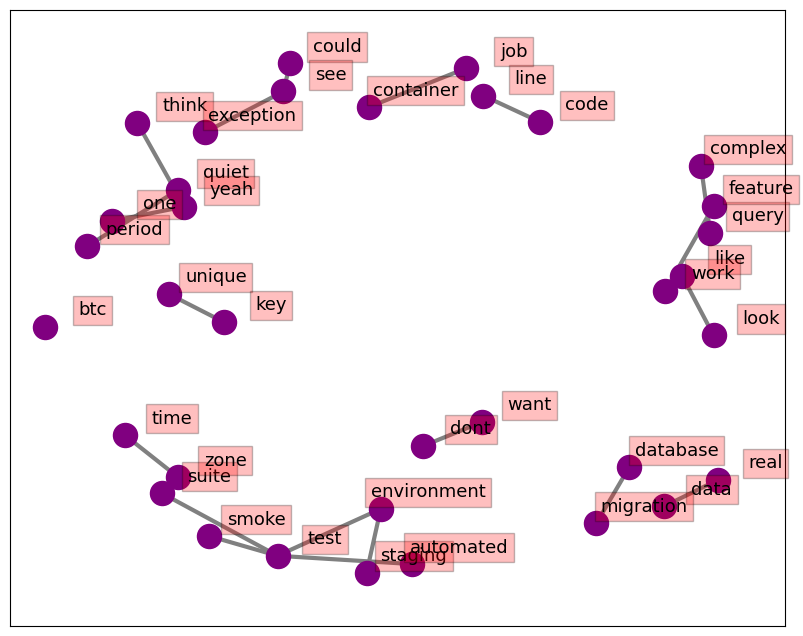

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

# **Topic**

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vect = CountVectorizer(max_df=0.8, min_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')

# Fit and transform the data
X = vect.fit_transform(df.Phrases)
X

<36x27 sparse matrix of type '<class 'numpy.int64'>'
	with 272 stored elements in Compressed Sparse Row format>

In [80]:
import gensim
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=2,
                                               random_state=5, num_topics=10, workers=2)
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.150*"change" + 0.132*"think" + 0.125*"data" + 0.090*"kind" + 0.053*"like" + 0.052*"yeah" + 0.050*"feature" + 0.049*"actually" + 0.042*"migration" + 0.042*"things"


Topic: 1 
Words: 0.196*"table" + 0.090*"able" + 0.080*"yeah" + 0.066*"just" + 0.066*"actually" + 0.056*"database" + 0.056*"like" + 0.052*"problem" + 0.045*"think" + 0.042*"test"


Topic: 2 
Words: 0.105*"just" + 0.094*"yeah" + 0.089*"database" + 0.087*"think" + 0.058*"test" + 0.052*"time" + 0.051*"data" + 0.051*"kind" + 0.049*"problem" + 0.048*"thing"


Topic: 3 
Words: 0.218*"environment" + 0.115*"yeah" + 0.114*"staging" + 0.082*"just" + 0.057*"data" + 0.056*"like" + 0.047*"test" + 0.030*"able" + 0.029*"really" + 0.025*"trying"


Topic: 4 
Words: 0.226*"staging" + 0.122*"database" + 0.107*"migration" + 0.051*"environment" + 0.044*"data" + 0.035*"test" + 0.034*"did" + 0.032*"thing" + 0.031*"change" + 0.029*"problem"


Topic: 5 
Words: 0.170*"feature" + 0.129*"environment" + 0.094*"like" + 0.090*"yeah" + 0

In [81]:
my_document = df.Phrases[5]
my_document
def topic_distribution(string_input):
    string_input = [string_input]
    # Fit and transform
    X = vect.transform(string_input)
# Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    output = list(ldamodel[corpus])[0]

    return output
topic_distribution(my_document)

[(0, 0.012503059),
 (1, 0.012500496),
 (2, 0.012501476),
 (3, 0.0125008635),
 (4, 0.012500552),
 (5, 0.01250037),
 (6, 0.012502234),
 (7, 0.012500843),
 (8, 0.88749003),
 (9, 0.01250011)]